In [1]:
import pandas as pd
import seaborn as sns

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [4]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [39]:
penguin_train, penguin_test = train_test_split(penguins, test_size=0.3, stratify=penguins['sex'], random_state=42)

In [40]:
features= ['flipper_length_mm']
dt = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(penguin_train[features], penguin_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [41]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

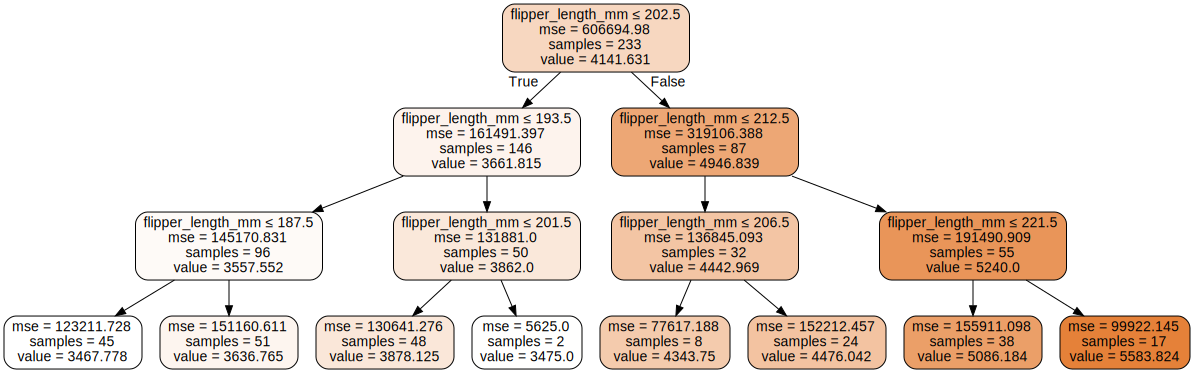

In [42]:
plot_tree_regression(dt, features)

De MSE values zijn zeer groot aangezien body mass in gram is opgenomen. De voorspelling is dat de RMSE rond de 15% verschil zal liggen

In [43]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [44]:
predictionsOnTrainset = dt.predict(penguin_train[features])
predictionsOnTestset = dt.predict(penguin_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguin_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguin_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 367.2954444792054
RMSE on test set 384.2157953682003


In [48]:
penguins["body_mass_g"].mean()

4207.057057057057

De RMSE is 384. Dit betekent dat de voorspellingen op de test groep ongeveer 384g van het gemiddelde van alle body_mass waardes liggen. De mean van de body mass is 4207. Dit betekent dat de RMSE ongeveer 9.1% verschil heeft, wat veel lager is dan ik verwachtte. Hieruit blijkt dat de flipper size een goede indicatie is van de body mass.